In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [2]:
# Define the transform to preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image data
])


In [3]:
# MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DOWNLOAD AND EXTRACT
# http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

In [4]:
len(train_set), len(test_set)

(60000, 10000)

In [5]:
class_names = train_set.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
class_to_idx = train_set.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
image, label = train_set[0]

print(f"\nImage shape: {image.shape} -> [color_channels, height, width]") 
print(f"\nImage label: {class_names[label]}")



Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]

Image label: 5 - five


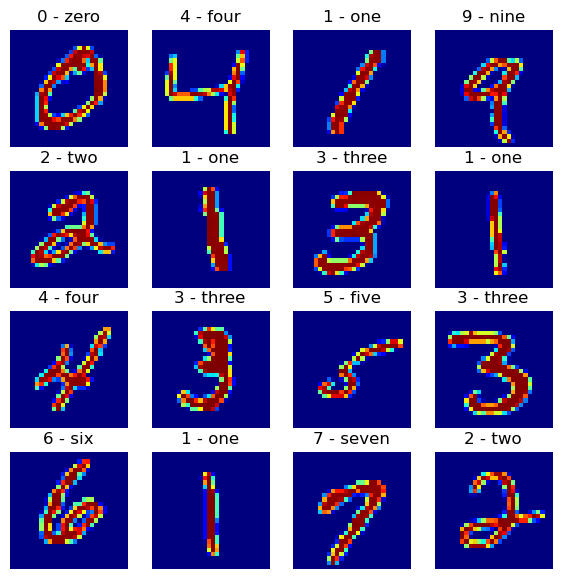

In [8]:
import matplotlib.pyplot as plt

rows, cols = 4, 4
fig = plt.figure(figsize=(7, 7))

for i in range(1, rows * cols + 1):
  img, label = train_set[i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="jet")
  plt.title(class_names[label])
  plt.axis(False)


## Random, grayscale

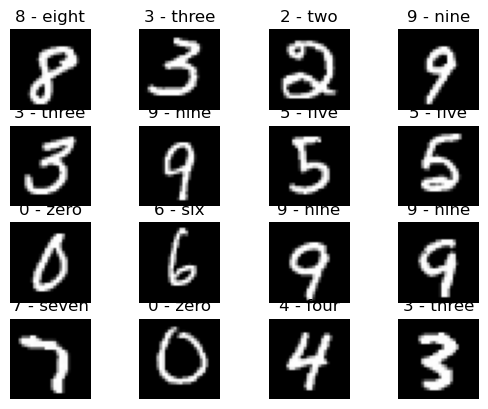

In [9]:
fig = plt.figure()

for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_set), size=[1]).item()
  img, label = train_set[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [11]:
from torch import nn

# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = image

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happened
print(f"\nShape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
